### Student Information
Name: Po-Yu Yeh@CYCU

Student ID: 11020140

GitHub ID: oldper

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### Begin Assignment Here


### First part

In [1]:
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh
import pandas as pd

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

/home/oldper/miniconda3/envs/DM2024Lab/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
X[X['category']==2]
X.query("category==1")

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
# Answer here

'''
Let't define what is null in isnull() method first.
Generally, np.nan, empty, None are null in the method.
So 0,1,4 are null.

As for the data of index of 2, 3 are two string that represent 'NaN' and 'None'.
And as for the data of index of 5 is an empty string which is not nan or None.
'''

for i in range(NA_df.shape[0]):
    print(f"Index: {i}: data: {NA_df['missing_example'][i]}, type={type(NA_df['missing_example'][i])}")

Index: 0: data: nan, type=<class 'float'>
Index: 1: data: nan, type=<class 'float'>
Index: 2: data: NaN, type=<class 'str'>
Index: 3: data: None, type=<class 'str'>
Index: 4: data: None, type=<class 'NoneType'>
Index: 5: data: , type=<class 'str'>


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000) #random state

In [7]:
# Answer here

# Different shpae (number of rows)
print("Shape of X:", X.shape)
print("Shape of X_sample:", X_sample.shape)
print()

# Ehhh.... This is the same as previous reply
print("Number of unique values in X:", X.nunique())
print("Number of unique values in X_sample:", X_sample.nunique())
print()

# The indices are different between X and X_sample
print("Indices of X:", X.index)
print("Indices of X_sample:", X_sample.index)

Shape of X: (2257, 3)
Shape of X_sample: (1000, 3)

Number of unique values in X: text             2257
category            4
category_name       4
dtype: int64
Number of unique values in X_sample: text             1000
category            4
category_name       4
dtype: int64

Indices of X: RangeIndex(start=0, stop=2257, step=1)
Indices of X_sample: Index([1750,  519,  710,  980, 1347, 1553,  477, 2239,  916, 1250,
       ...
       1956,   14,  386,  286, 1181,   27, 1500, 1779, 1842, 1962],
      dtype='int64', length=1000)


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

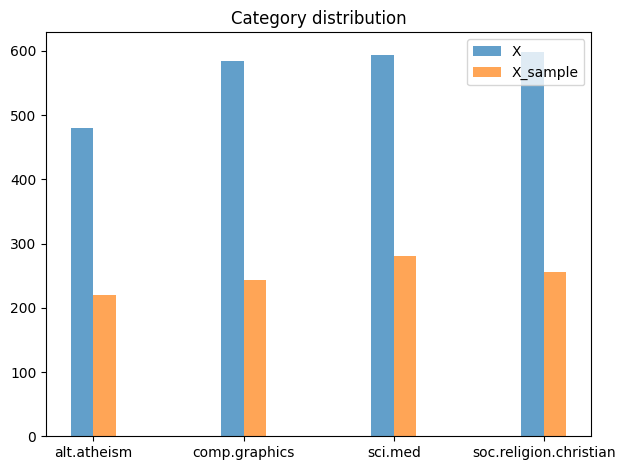

In [8]:
import matplotlib.pyplot as plt
counts_X = X.category_name.value_counts()
counts_X_sample = X_sample.category_name.value_counts()

# Create a common index for both (union of category names from both)
all_categories = counts_X.index.union(counts_X_sample.index)

# Reindex both counts so they align by category, filling missing categories with 0
counts_X = counts_X.reindex(all_categories, fill_value=0)
counts_X_sample = counts_X_sample.reindex(all_categories, fill_value=0)

bar_width = 0.15
index = np.arange(len(all_categories))

plt.bar(index - bar_width/2, counts_X, bar_width, label='X', alpha=0.7)
plt.bar(index + bar_width/2, counts_X_sample, bar_width, label='X_sample', alpha=0.7)

plt.title('Category distribution')
plt.xticks(index, all_categories, rotation=0, fontsize=10)

# Add legend
plt.legend(loc=1)
plt.tight_layout()
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [10]:
second_one = np.where(X_counts[4].toarray()[0]==1)[0][1] # Get second '1' in the matrix
second_one_term = count_vect.get_feature_names_out()[second_one]
print(f"Second '1' is at the index of {second_one}, and it represent the '{second_one_term}' term")

Second '1' is at the index of 37, and it represent the '01' term


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

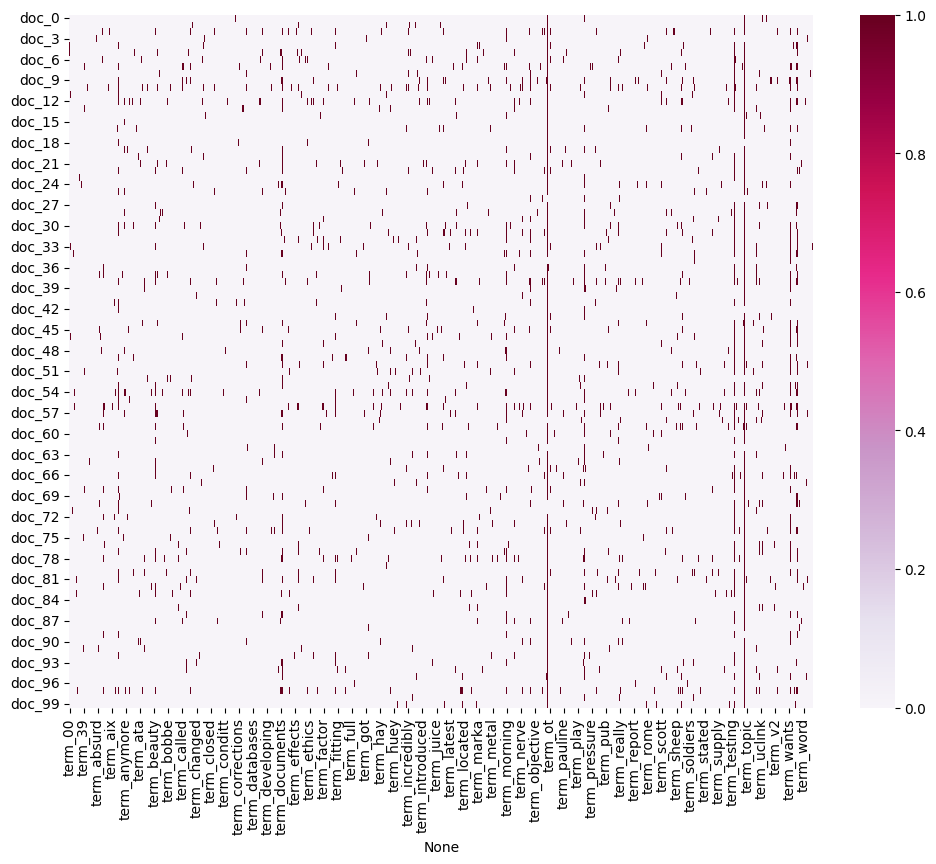

In [11]:
# Answer here
import seaborn as sns
# I would filter some words which are exist less.
term_freq = np.asarray(X_counts.sum(axis=0)).flatten()

# Filter with minimun number
mins = 10
terms = np.where(term_freq > mins)[0]


# get x y z
plot_z = X_counts[:, terms][:100, :].toarray() 
plot_y = ["doc_"+ str(i) for i in list(X.index)[:100]]
plot_x = ["term_"+count_vect.get_feature_names_out()[terms]]


df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1)
plt.show()

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [12]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(np.sum(X_counts[:,j].toarray()))

In [13]:
# Answer here
import plotly.express as px
# Ehh... Because it may take too much time to plot a figure and the x labels may be pretty ugly, so I use the same way as excercise 13 to reduce the sample size
min_freq = 5000
filtered_terms = [(term, freq) for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies) if freq > min_freq]
terms, frequencies = zip(*filtered_terms)

# Create a DataFrame for Plotly (Plotly works well with pandas)
import pandas as pd
df = pd.DataFrame({
    'Term': terms,
    'Frequency': frequencies
})

# Create an interactive bar plot using Plotly
fig = px.bar(df, x='Term', y='Frequency', height=600, width=1000)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-90)

# Show the interactive plot
fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


/tmp/ipykernel_4526/1970959163.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



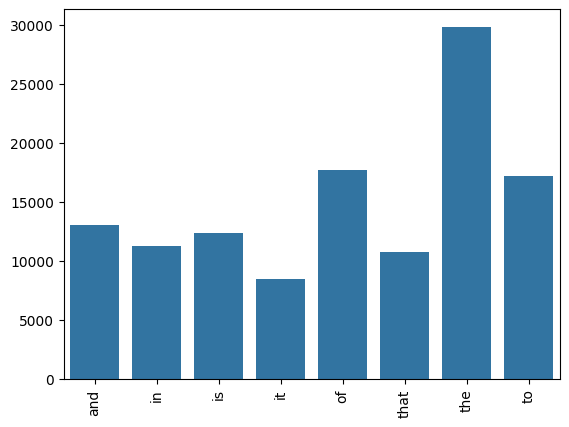

In [14]:
# Answer here
# I want to reduce the number of terms by the frquency of the existence of each vocabulary
# To do that, I use min_freq to reduece the number of samples
min_freq = 8000
filtered_terms = [(term, freq) for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies) if freq > min_freq]
terms, frequencies = zip(*filtered_terms)
g = sns.barplot(x=terms, y=frequencies)
g.set_xticklabels(terms, rotation=90)
plt.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

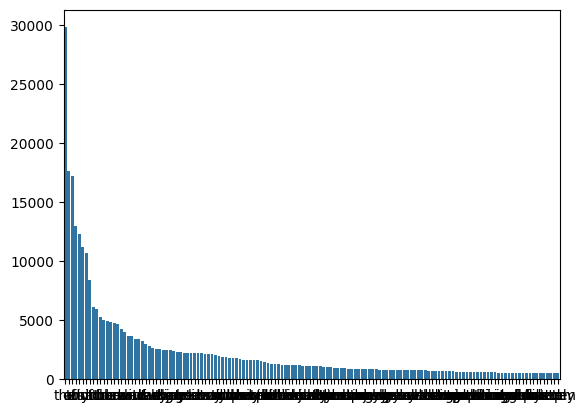

In [15]:
# Answer here
# Ehh... Because it may use take much time to plot a figure and the x labels may be pretty ugly, so I use the same way as excercise 13 to reduce the sample size
min_freq = 500
filtered_terms = [(term, freq) for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies) if freq > min_freq]
filtered_terms.sort(key = lambda x: x[1], reverse =True)
terms, frequencies = zip(*filtered_terms)
g = sns.barplot(x=terms, y=frequencies)
# g.set_xticklabels(terms, rotation=90, fontsize=3)
plt.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

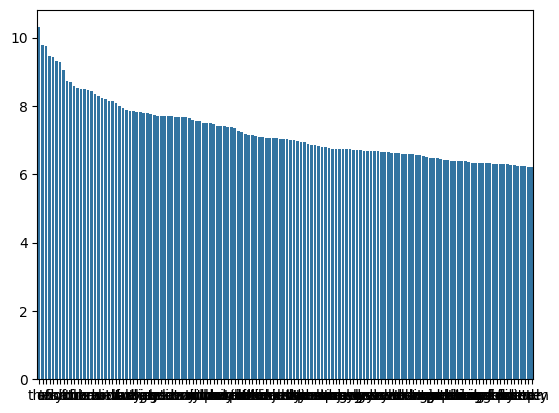

"\nThe long tail graph is flattened as below.\nIn the other words, the difference between different terms maybe reduce.\nOh.. There's another difference, I need to change the code of min_freq with adding math.log().\n"

In [16]:
# Answer here
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
min_freq = math.log(500)
filtered_terms = [(term, freq) for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies_log) if freq > min_freq]
filtered_terms.sort(key = lambda x: x[1], reverse =True)
terms, frequencies = zip(*filtered_terms)
g = sns.barplot(x=terms, y=frequencies)
# g.set_xticklabels(terms, rotation=90, fontsize=3)
plt.show()

'''
The long tail graph is flattened as below.
In the other words, the difference between different terms maybe reduce.
Oh.. There's another difference, I need to change the code of min_freq with adding math.log().
'''

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [17]:
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [18]:
# Answer here
# Maybe we can do a intersection


category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words0 = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]


category_number=1 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words1 = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]


category_number=2 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words2 = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

category_number=3 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]
# Filter terms that belong to the top 5% based on their rank
filtered_words3 = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

intersection = list(set(filtered_words0)&set(filtered_words1)&set(filtered_words2)&set(filtered_words3))
print(intersection)

'''
Obviously, there's no intersection between these four.
And acutually I have nothing to do. And with my observation, the words we filtered are a little wired, so I'm not pretty sure.
'''

['124', '10984', '0423', '042100', '08786', '10665', '08057', '0358', '1113', '10h', '1400', '03051', '0349', '024150', '1356', '084', '1000mg', '0235', '034226', '115072', '141034', '13676', '1328', '05', '0510', '02160', '110mbytes', '141592654', '136', '02908', '114127', '141148c09630gk', '115300', '0900', '115287', '0237', '1333', '033446', '0x1f', '10818', '100lez', '0903', '100039', '11004', '13495', '1273', '01752', '1268', '07410', '134', '10179', '081', '060493161931', '13779', '103', '020637', '125545', '1316', '020', '11857', '14261', '0306', '1266', '115290', '14072', '0511', '1111', '110', '033843', '10669', '102007', '115', '114140', '118', '021635', '1337']


"\nObviously, there's no intersection between these four.\nAnd acutually I have nothing to do. And with my observation, the words we filtered are a little wired, so I'm not pretty sure.\n"

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [19]:
# Answer Here
from PAMI.frequentPattern.topk import FAE  as alg

obj500 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=500)
obj500.mine()
print('k=500 Runtime: ' + str(obj500.getRuntime()))

obj1000 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=1000)
obj1000.mine()
print('k=1000 Runtime: ' + str(obj1000.getRuntime()))

obj1500 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=1500)
obj1500.mine()
print('k=1500 Runtime: ' + str(obj1500.getRuntime()))

 TopK frequent patterns were successfully generated using FAE algorithm.
k=500 Runtime: 0.6975436210632324
 TopK frequent patterns were successfully generated using FAE algorithm.
k=1000 Runtime: 1.6032819747924805
 TopK frequent patterns were successfully generated using FAE algorithm.
k=1500 Runtime: 3.680809497833252


In [20]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg2
print('import done')
obj3 = alg2.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=3)
obj3.mine()
print('min=3 Runtime: '+ str(obj3.getRuntime()))

obj6 = alg2.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=6)
obj6.mine()
print('min=6 Runtime: '+ str(obj6.getRuntime()))

obj9 = alg2.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=9)
obj9.mine()
print('min=9 Runtime: '+ str(obj9.getRuntime()))

import done
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
min=3 Runtime: 20.08916425704956
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
min=6 Runtime: 0.418515682220459
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
min=9 Runtime: 0.1091611385345459


### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [21]:
import pandas as pd
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
         Patterns  Support
19912   institute       33
19911         gov       33
57158     snm6394       32
19910        form       31
19909          08       30
...           ...      ...
11        holland        9
10         deeply        9
9        unlikely        9
8      transplant        9
7       recurrent        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [22]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

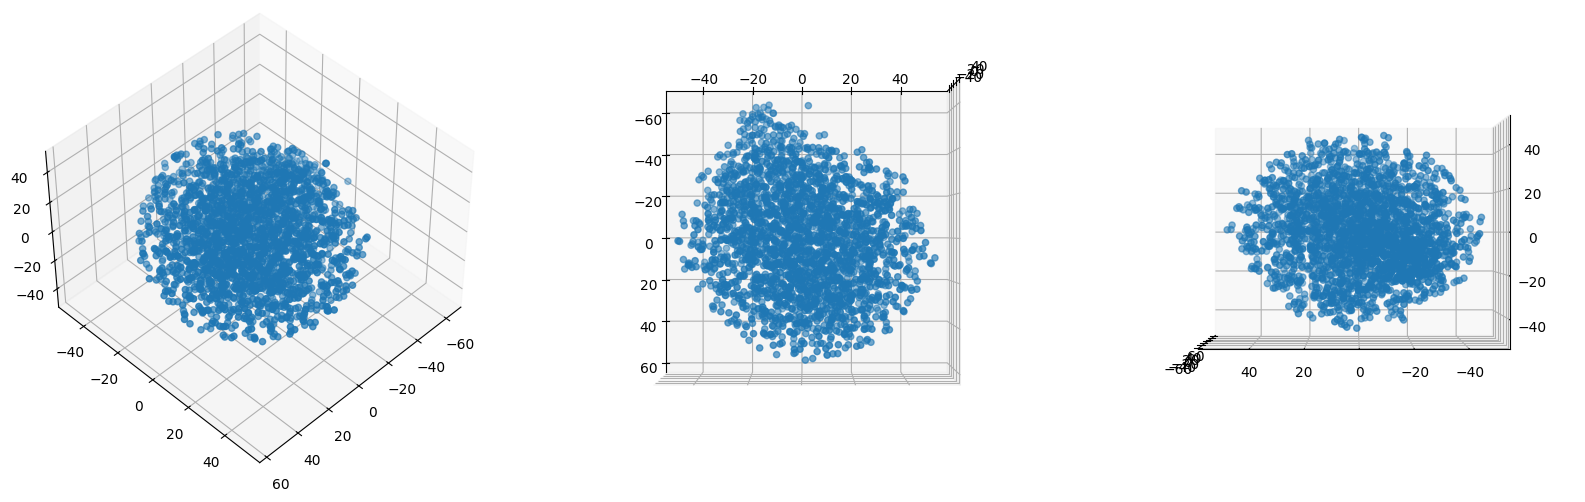

"\nEhhh... Acutually, the samples are too much, so I can only see a bound of samples and with some angles, there're some outliers.\n"

In [23]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
test = TSNE(n_components=3).fit_transform(tdm_df.values)
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(test[:,0], test[:,1], test[:,2])
ax.view_init(elev=45, azim=45)

ax = fig.add_subplot(132, projection='3d')
ax.scatter(test[:,0], test[:,1], test[:,2])
ax.view_init(elev=90, azim=0)

ax = fig.add_subplot(133, projection='3d')
ax.scatter(test[:,0], test[:,1], test[:,2])
ax.view_init(elev=0, azim=180)

plt.show()


'''
Ehhh... Acutually, the samples are too much, so I can only see a bound of samples and with some angles, there're some outliers.
'''

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [24]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit_transform(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

'''
Ohh.. The answer is yes if I use fit_transform with category name again.
But with the original mlb, the answer will be no.
'''
X['bin_category_name']

0       [0, 1, 0, 0]
1       [0, 1, 0, 0]
2       [0, 0, 0, 1]
3       [0, 0, 0, 1]
4       [0, 0, 0, 1]
            ...     
2252    [0, 0, 1, 0]
2253    [0, 0, 1, 0]
2254    [0, 0, 1, 0]
2255    [0, 0, 1, 0]
2256    [0, 0, 1, 0]
Name: bin_category_name, Length: 2257, dtype: object

## Part 2

In [25]:
import pandas as pd

# read data
X = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# data cleaning
X.dropna(inplace=True)
X.drop_duplicates(keep=False, inplace=True)
X = X.reset_index(drop=True)
dict1 = {'nostalgia': 1, 'not nostalgia': 0}
X['binary_sentiment'] = X['sentiment'].map(dict1)
# sampling
X_sample = X.sample(1000)

# Because the number of data is not too big, so I will use original data than sampled data.


sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

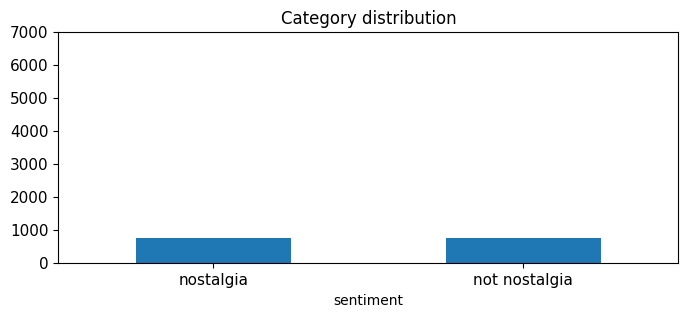

In [26]:
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 7000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
nostalgia        503
not nostalgia    497
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

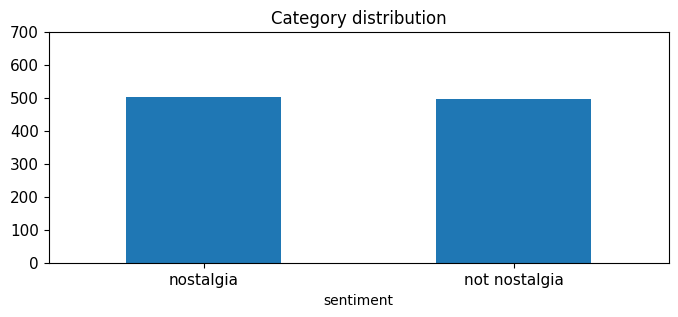

In [27]:
print(X_sample.sentiment.value_counts())

# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [28]:
import nltk
import helpers.data_mining_helpers as dmh

nltk.download('punkt_tab')
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt_tab to /home/oldper/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix

In [30]:
import numpy as np
term_frequencies_df = []
for j in range(0,X_counts.shape[1]):
    term_frequencies_df.append(np.sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

/tmp/ipykernel_4526/1292716062.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



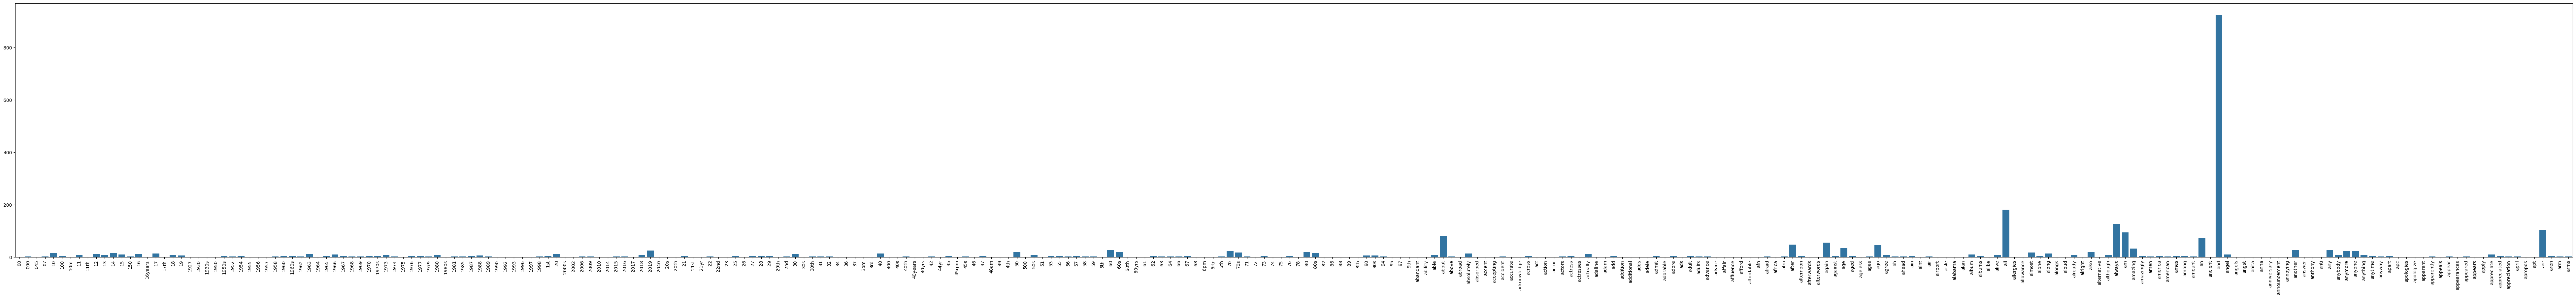

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [33]:
category_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

In [34]:
category_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

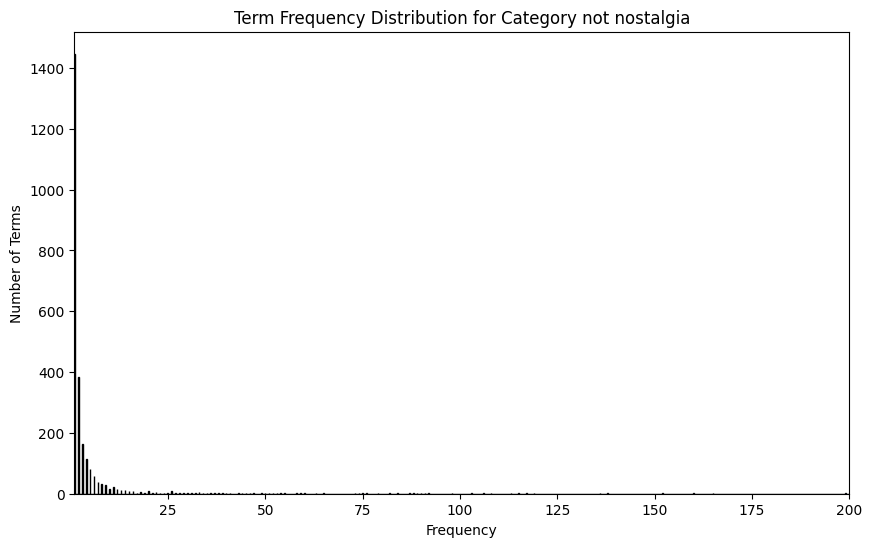

In [35]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

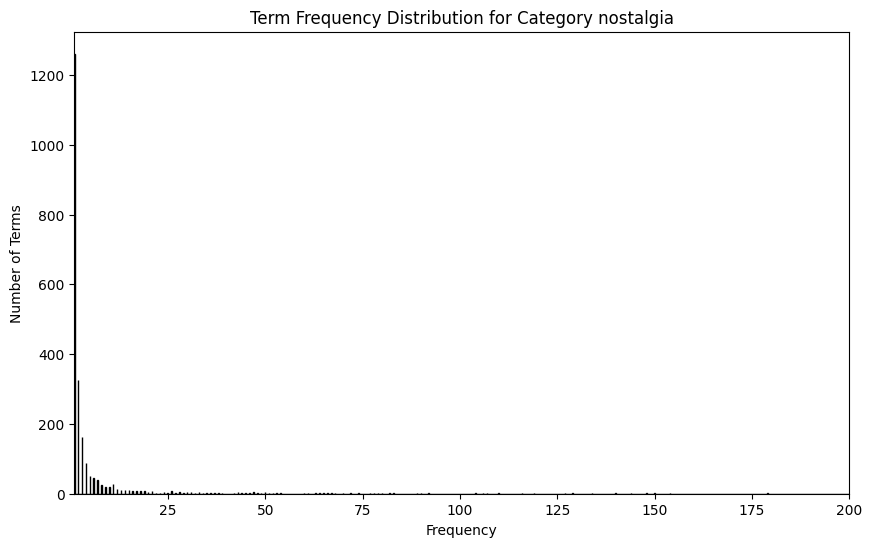

In [36]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [37]:
category_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'and', 'this', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'singer', 'an', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'some', 'video', 'man', 'listening', 'heard', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

In [38]:
category_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [39]:
# I updated my PAMI library and changed my code here. But it didn't work. So, I still use the previous code 
from PAMI.extras.DF2DB import DenseFormatDF as db
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)




In [40]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_nostalgia_minSup9.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.8962390422821045


In [41]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_not_nostalgia_minSup9.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 0.5195586681365967


In [42]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                     Patterns  Support
66060                memories      227
68309                   to my      227
68304                 song my      212
68313                the this      212
68311                  the my      192
...                       ...      ...
55118    on so it song my was        9
55117        on so it song my        9
55116  was on so it song this        9
55115      on so it song this        9
55112     was on so it the in        9

[74588 rows x 2 columns]
Number of patterns discarded: 6846


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for i, pattern in enumerate(final_pattern_df['Patterns']):
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['unigrams'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
    if i % 1000 == 0:
        print(i)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000


00  000  045  07  10  100  10m  11  11th  12  ...  \
0      0    0    0   0   0    0    0   0     0   0  ...   
1      0    0    0   0   0    0    0   0     0   0  ...   
2      0    0    0   0   0    0    0   0     0   0  ...   
3      0    0    0   0   0    0    0   0     0   0  ...   
4      0    0    0   0   0    0    0   0     0   0  ...   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   
1493   0    0    0   0   0    0    0   0     0   0  ...   
1494   0    0    0   0   0    0    0   0     0   0  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...   
1496   0    0    0   0   0    0    0   0     0   0  ...   
1497   0    0    0   0   0    0    0   0     0   0  ...   

      on so song to my this  was on so it to this  on so it to this  \
0                         0                     0                 0   
1                         0                     0                 0   
2                         0                     0                 0   
3                         0                     0                 0   
4                         0                     0                 0   
...                     ...                   ...               ...   
1493                      0                     0                 0   
1494                      0                     0                 0   
1495                      0                     0                 0   
1496                      0                     0                 0   
1497                      0                     0                 0   

      on so it song to was  on so it song to  on so it song my was  \
0                        0                 0                     0   
1                        0                 0                     0   
2                        0                 0                     0   
3                        0                 0                     0   
4                        0                 0                     0   
...                    ...               ...                   ...   
1493                     0                 0                     0   
1494                     0                 0                     0   
1495                     0                 0                     0   
1496                     0                 0                     0   
1497                     0                 0                     0   

      on so it song my  was on so it song this  on so it song this  \
0                    0                       0                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   
...                ...                     ...                 ...   
1493                 0                       0                   0   
1494                 0                       0                   0   
1495                 0                       0                   0   
1496                 0                       0                   0   
1497                 0                       0                   0   

      was on so it the in  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
1493                    0  
1494                    0  
1495                    0  
1496                    0  
1497                    0  

[1498 rows x 78318 columns]

In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

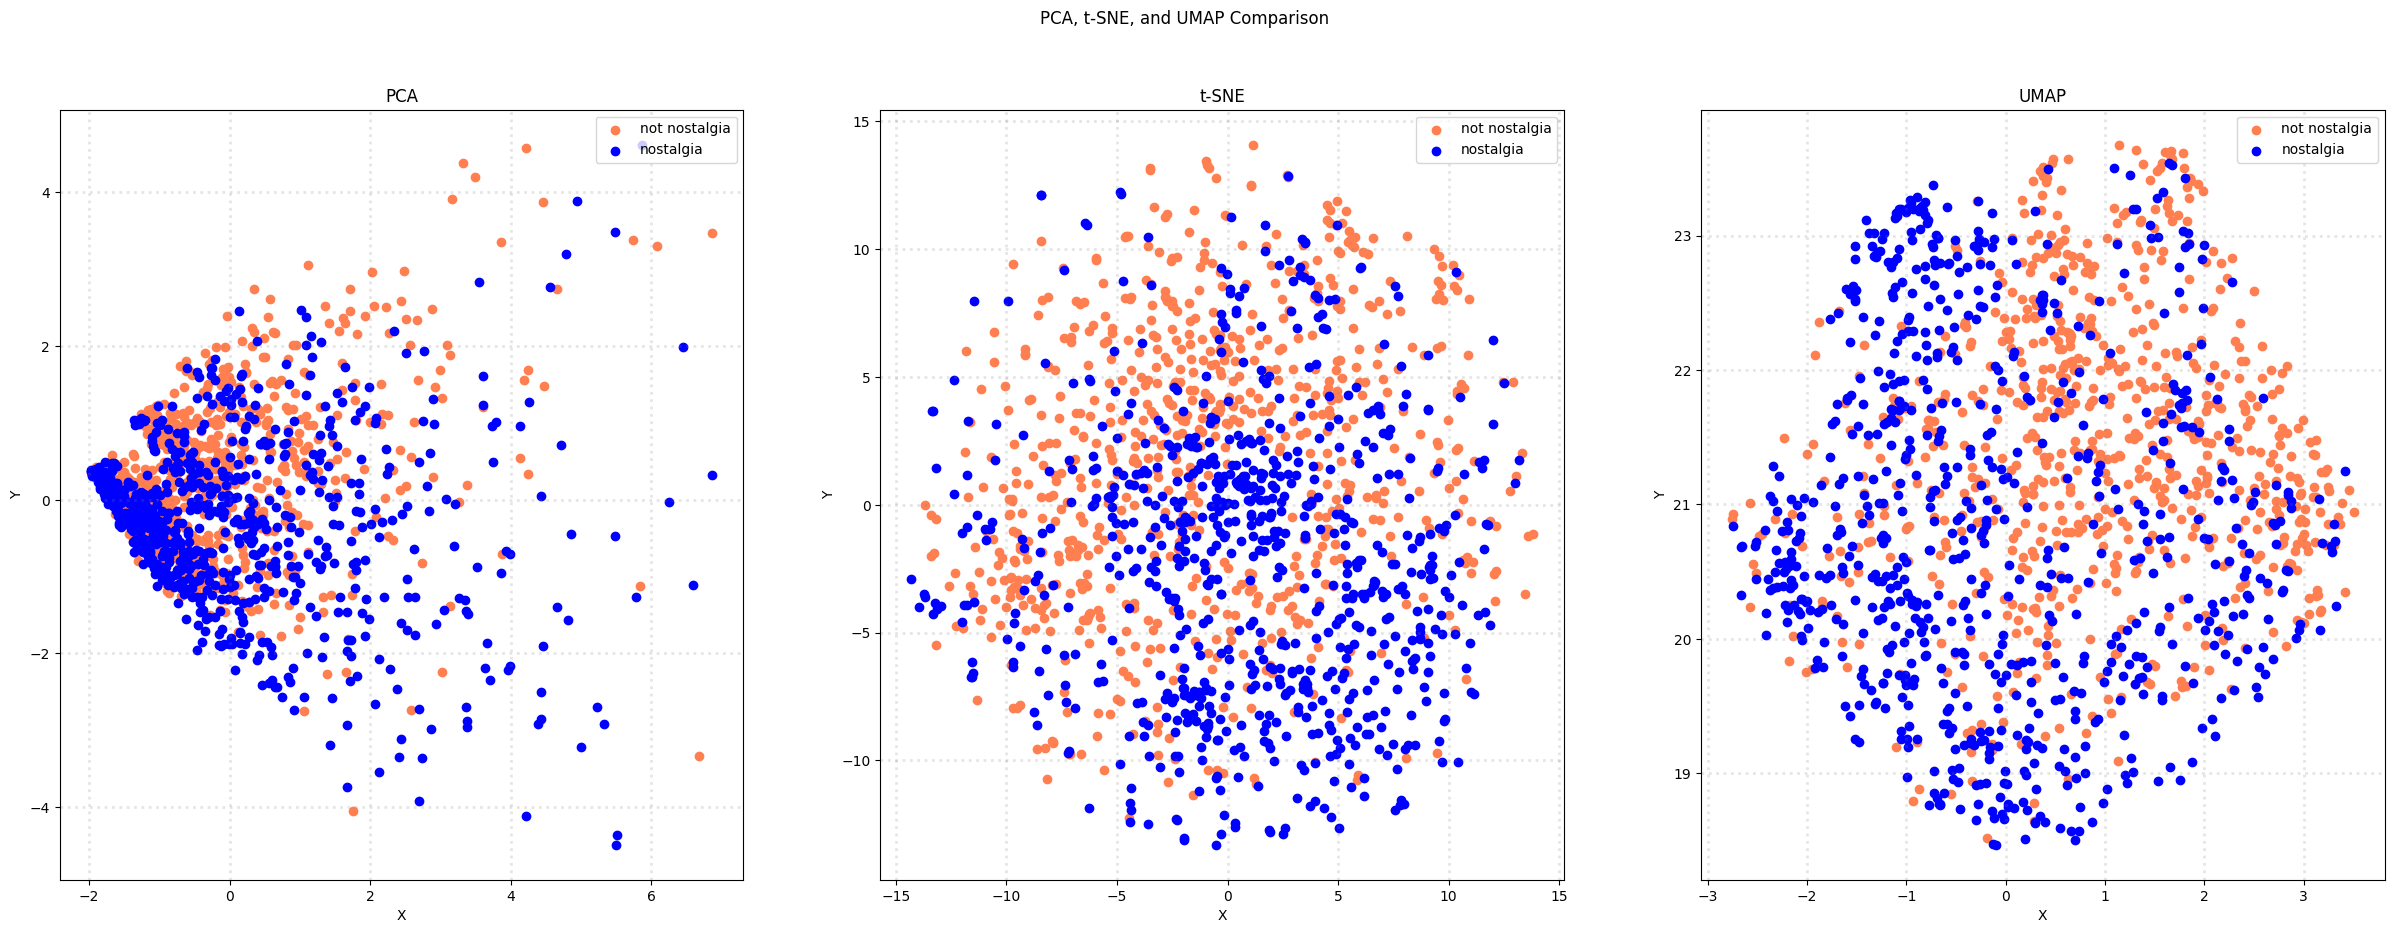

In [45]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [46]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

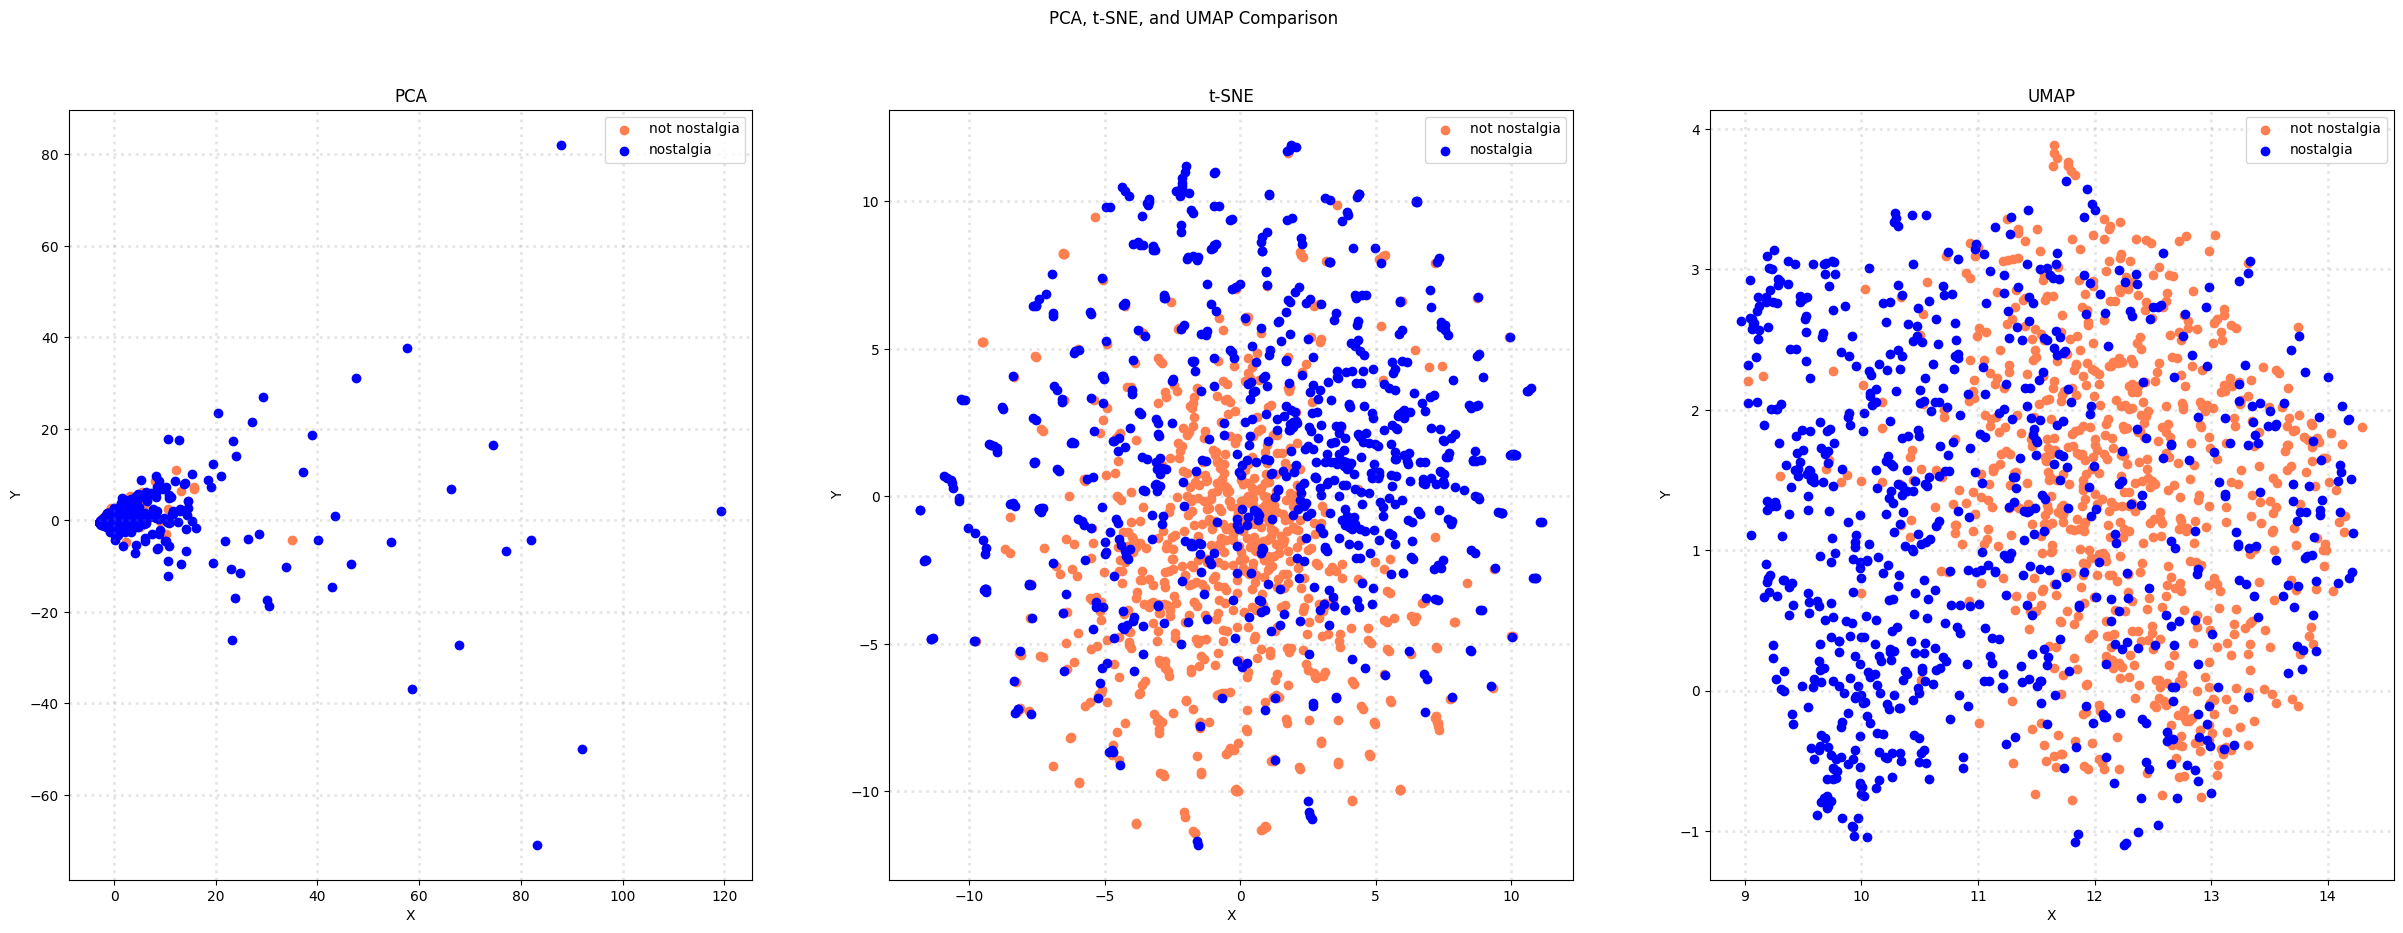

In [47]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [48]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [49]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [50]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

## Part 3

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['binary_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['binary_sentiment'], test_size=0.3, random_state=42)

In [52]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [53]:
# TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_mat = vectorizer.fit_transform(X['comment'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_mat, X['binary_sentiment'], test_size=0.2, random_state=42)

In [54]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.86

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9365    0.7763    0.8489       152
    nostalgia     0.8046    0.9459    0.8696       148

     accuracy                         0.8600       300
    macro avg     0.8706    0.8611    0.8592       300
 weighted avg     0.8714    0.8600    0.8591       300



In [55]:
!pip install wordcloud

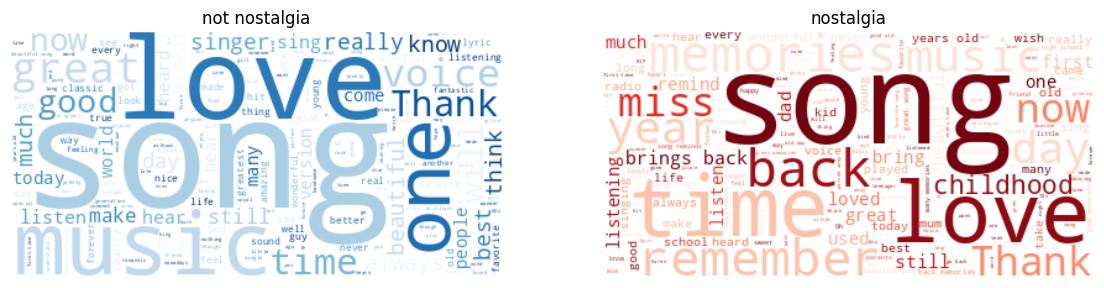

In [57]:
# I use wordcloud as my new visualization way.
# And this type of graph use size to emphazise the frequency of word.
from wordcloud import WordCloud

text_0 = WordCloud(background_color='white', colormap='Blues').generate(" ".join(X[X['binary_sentiment'] == 0]['comment'].astype(str)))
text_1 = WordCloud(background_color='white', colormap='Reds').generate(" ".join(X[X['binary_sentiment'] == 1]['comment'].astype(str)))

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(text_0, interpolation="bilinear")
plt.axis("off")
plt.title("not nostalgia")

plt.subplot(1, 2, 2)
plt.imshow(text_1, interpolation="bilinear")
plt.axis("off")
plt.title("nostalgia")

plt.show()

## Part 4

In the new dataset, I think there's only two step I need to do, tokenization and feature generation. Even, tokenization may not be a neccesary step. But this dataset is really clean, it doesn't contain na or duplicated element. So, it's really easy to preprocess. And you may notice that I use the original dataset than using sampled dataset because the dataset size is not too big for me to decrease the size.

To sum up...
1. In the data preprocessing procedure, I the only thing I need to do is feature creation (like IF-IDF or frq).
2. Because the dataset is really clean and not too big, I don't need to deal with duplicated sample or na or sampling.
3. Because the dataset only requires binary classification. I don't need a further class binarization or discretization.
4. And so on, I don't need to use dimension decreassing or feature subset selection technique.

## Part 5

I only include the minimum code that make this notebook can run from head to tail. So, enjoy it. :)